## Naveen_Garlapati_602_week1_assignment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

df = pd.read_csv(r'C:\Users\WELCOME\Downloads\who.csv')


In [3]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

# Question 1 - Answers

In [5]:
df['country'].value_counts()

Afghanistan                          34
Netherlands                          34
New Zealand                          34
Nicaragua                            34
Niger                                34
                                     ..
Serbia                                9
Curacao                               4
Bonaire, Saint Eustatius and Saba     4
Sint Maarten (Dutch part)             4
South Sudan                           3
Name: country, Length: 219, dtype: int64

### a. How many countries are present?

In [6]:
df['country'].nunique()

219

### b.  What's the timespan of the data?

In [7]:
max(df['year'])-min(df['year'])+1

34

### c. Does each country have a row for every year present?

In [8]:
num_of_years = df['year'].nunique()

In [9]:
cntr_list = list(set(df['country'].tolist()))

In [10]:
flag = 0
for c in cntr_list:
    if df[df['country'] == c]['year'].nunique() !=num_of_years:
        flag = 1
        break
if flag ==0:
    print("yes")
elif flag == 1:
    print("NO")

NO


##### Ans - No each country does not have a row for every year present, There are 9 such countries

### d. Which countries are missing years?

In [11]:
num_of_years = df['year'].nunique()
cntr_list = list(set(df['country'].tolist()))

In [12]:
i = 0
for c in cntr_list:
    if df[df['country'] == c]['year'].nunique() !=num_of_years:
        print(c)
        i = i+1
print("-----------")
print(str(i) + " countries have missing years")


Serbia
Sint Maarten (Dutch part)
Montenegro
Bonaire, Saint Eustatius and Saba
Timor-Leste
Netherlands Antilles
Serbia & Montenegro
Curacao
South Sudan
-----------
9 countries have missing years


### e. How many rows have at least 1 non-null values across the columns 3-57?

In [13]:
## removing all the rows which have null values for all the columns 3 - 57
len(df.iloc[:,3:58].dropna(thresh = 1))


3484

## Question 2

In [14]:
df.head()

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df1 = pd.melt(df, id_vars = ["country","year"],var_name="diagnosis method",value_name = "number of cases")

In [16]:
df1['diagnosis method'].value_counts()

new_sp_m014     7240
new_sp_m1524    7240
new_ep_m2534    7240
new_ep_m3544    7240
new_ep_m4554    7240
new_ep_m5564    7240
new_ep_m65      7240
new_ep_f014     7240
new_ep_f1524    7240
new_ep_f2534    7240
new_ep_f3544    7240
new_ep_f4554    7240
new_ep_f5564    7240
new_ep_f65      7240
newrel_m014     7240
newrel_m1524    7240
newrel_m2534    7240
newrel_m3544    7240
newrel_m4554    7240
newrel_m5564    7240
newrel_m65      7240
newrel_f014     7240
newrel_f1524    7240
newrel_f2534    7240
newrel_f3544    7240
newrel_f4554    7240
newrel_f5564    7240
new_ep_m1524    7240
new_ep_m014     7240
new_sn_f65      7240
new_sp_f65      7240
new_sp_m2534    7240
new_sp_m3544    7240
new_sp_m4554    7240
new_sp_m5564    7240
new_sp_m65      7240
new_sp_f014     7240
new_sp_f1524    7240
new_sp_f2534    7240
new_sp_f3544    7240
new_sp_f4554    7240
new_sp_f5564    7240
new_sn_m014     7240
new_sn_f5564    7240
new_sn_m1524    7240
new_sn_m2534    7240
new_sn_m3544    7240
new_sn_m4554 

In [17]:
### By looking at the data , gender in the each column name starts at 7th position 

### By looking at the data, age in each column starts at 8th position
def get_gender(x):
    if x.startswith("new_sp"):
        return x[7]
    elif x.startswith("new_ep"):
        return x[7]
    elif x.startswith("new_sn"):
        return x[7]
    elif x.startswith("newrel"):
        return x[7]
def get_age(x):
    if len(x[8:])==3:     ### if age has 3 values e.g,.new _sp_m014
        return str(x[8])+"-"+str(x[9:])    
    elif len(x[8:]) == 4:    ### if age has 4 values  e.g., new_sp_m1524
        return str(x[8:10])+"-"+str(x[10:])
    elif len(x[8:]) == 2:     ### if age has 2 values  2.g,. new_ep_m65
        return str(x[8:]) + " years or older"

In [18]:
df1['gender'] = df1['diagnosis method'].apply(lambda x : get_gender(x))

In [19]:
df1['age'] = df1['diagnosis method'].apply(lambda x : get_age(x))

In [20]:
df1.replace({'diagnosis method': r'^new_sp.*$'}, {'diagnosis method': 'Pulmonary Smear (+)'}, regex=True,inplace = True)
df1.replace({'diagnosis method': r'^new_sn.*$'}, {'diagnosis method': 'Pulmonary Smear (-)'}, regex=True,inplace = True)
df1.replace({'diagnosis method': r'^new_ep.*$'}, {'diagnosis method': 'Extrapulmonary'}, regex=True, inplace = True)
df1.replace({'diagnosis method': r'^newrel.*$'}, {'diagnosis method': 'Relapse'}, regex=True, inplace = True)
df1

,country,year,diagnosis method,number of cases,gender,age
0,Afghanistan,1980,Pulmonary Smear (+),NaN,m,0-14
1,Afghanistan,1981,Pulmonary Smear (+),NaN,m,0-14
2,Afghanistan,1982,Pulmonary Smear (+),NaN,m,0-14
3,Afghanistan,1983,Pulmonary Smear (+),NaN,m,0-14
4,Afghanistan,1984,Pulmonary Smear (+),NaN,m,0-14
...,...,...,...,...,...,...
405435,Zimbabwe,2009,Relapse,NaN,f,65 years or older
405436,Zimbabwe,2010,Relapse,NaN,f,65 years or older
405437,Zimbabwe,2011,Relapse,NaN,f,65 years or older
405438,Zimbabwe,2012,Relapse,NaN,f,65 years or older


## Question 3

In [20]:
df1.head()

,country,year,diagnosis method,number of cases,gender,age
0,Afghanistan,1980,Pulmonary Smear (+),NaN,m,0-14
1,Afghanistan,1981,Pulmonary Smear (+),NaN,m,0-14
2,Afghanistan,1982,Pulmonary Smear (+),NaN,m,0-14
3,Afghanistan,1983,Pulmonary Smear (+),NaN,m,0-14
4,Afghanistan,1984,Pulmonary Smear (+),NaN,m,0-14


In [21]:
df2 = df1[~df1['number of cases'].isna()] ## removing rows where number of cases is unknown
df2 = df2[df2['number of cases'] > 0] ## removing because when 0 cases in any year, that year is not required
len(df2)

64966

In [22]:
df_grouped = df2.groupby('country')['year'].min().reset_index()  ## for each country, getting the starting year from when cases started

In [26]:
df_grouped.head()

,country,year
0,Afghanistan,1997
1,Albania,1995
2,Algeria,1997
3,American Samoa,1997
4,Andorra,1996


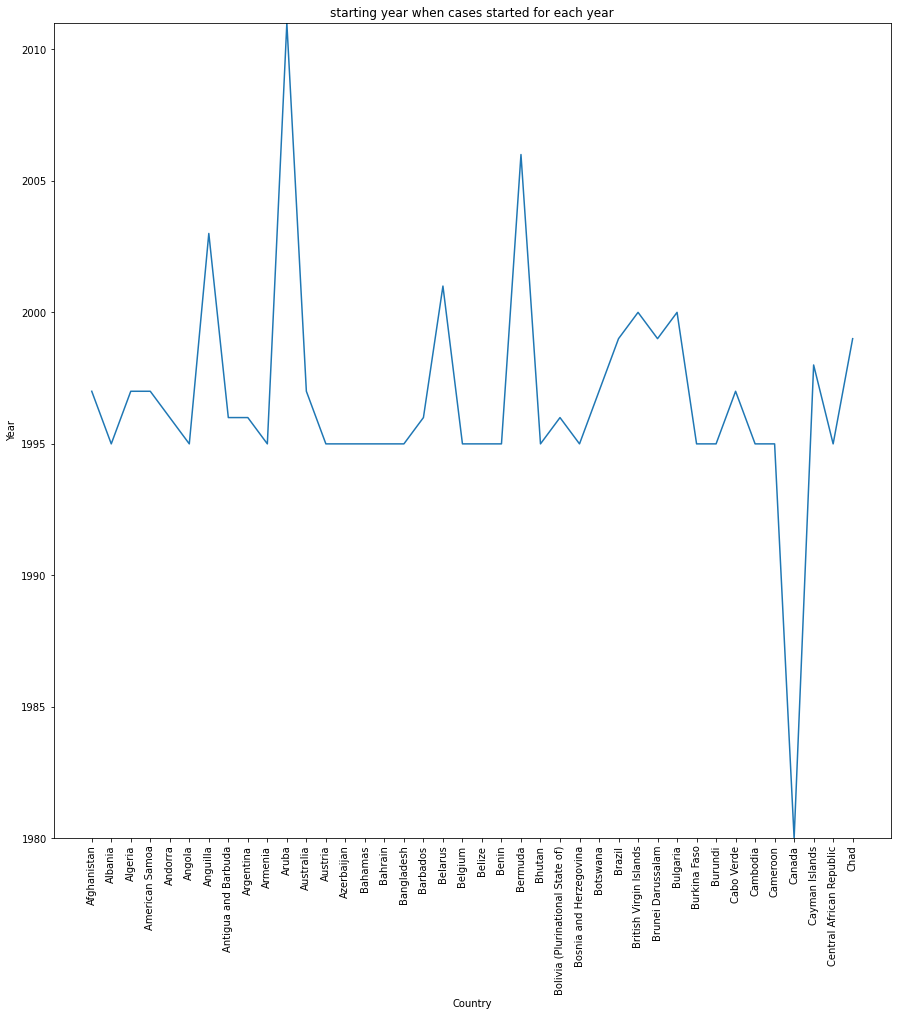

In [42]:
import seaborn as sns
plt.figure(figsize=(15,15))
ax = sns.lineplot(y=df_grouped['year'], x=df_grouped[:40]['country'])  # showing graph for few countries
ax.tick_params(axis='x', rotation=90)
plt.title("starting year when cases started for each year")
plt.xlabel("Country")
plt.ylabel("Year")
plt.ylim(min(df_grouped['year']),max(df_grouped['year']))
plt.show()